In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

upload 'shhs1-dataset-0.20.0 (1).csv' and 'shhs-data-dictionary-0.20.0-variables.csv'

In [2]:
shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', on_bad_lines=False)
var_dict = pd.read_csv('shhs-data-dictionary-0.20.0-variables.csv')

C:\Users\minyu\AppData\Local\Temp/ipykernel_1124/2261391821.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', error_bad_lines=False)
C:\Users\minyu\AppData\Local\Temp/ipykernel_1124/2261391821.py:1: DtypeWarning: Columns (1214) have mixed types. Specify dtype option on import or set low_memory=False.
  shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', error_bad_lines=False)


In [3]:
shhs1.shape

(5804, 1271)

In [4]:
var_dict.shape

(1896, 11)

# Data Processing

In [5]:
# remove sleep monitoring columns from independent variables (unattinable for predicting)
sleep_monitoring_col = var_dict[var_dict['folder'].str.contains(r'sleep monitoring', case=False, na=False)]['id']

In [6]:
sleep_monitoring_col

633        ahiov50
634     headbox_id
635        hrov150
636        hrund30
637     monitor_id
           ...    
1721      timest1p
1722       timest2
1723      timest2p
1724      timest34
1725          waso
Name: id, Length: 1093, dtype: object

In [7]:
# drop target variables, pptidr (has numerical and categorical values in one column), and sleep monitoring columns in independent variable
x = shhs1.drop(columns=['ahi_c0h4a', 'pptidr'])
for col in sleep_monitoring_col:
    if col in x.columns:
        x = x.drop(columns=col)

y = shhs1['ahi_c0h4a']

In [8]:
x

,nsrrid,pptid,ecgdate,lvh3_1,lvh3_3,st4_1_3,st5_1_3,lvhst,mob1,part2deg,...,educat,date02,date25,weight,waist,height,weight20,lang15,age_category_s1,visitnumber
0,200001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-48.0,0.0,65.0,86.0,178.0,69.0,1.0,7,1
1,200002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-111.0,-37.0,93.0,107.0,168.0,93.0,NaN,9,1
2,200003,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-7.0,0.0,51.0,82.0,145.0,50.7,1.0,9,1
3,200004,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-24.0,0.0,64.0,85.0,180.0,65.4,1.0,6,1
4,200005,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-89.0,-33.0,56.0,76.0,155.0,56.0,NaN,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,205800,5835,-854.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-168.0,1.0,70.5,99.0,166.0,70.8,1.0,8,1
5800,205801,5836,-755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,-95.0,1.0,83.6,99.0,176.0,82.8,1.0,6,1
5801,205802,5837,-768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,-83.0,1.0,75.0,91.0,175.0,74.2,1.0,7,1
5802,205803,5838,-755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-89.0,0.0,76.8,93.0,176.0,78.6,1.0,6,1


In [9]:
# normalize x
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors if needed
x_imputed_scaled = imputer.fit_transform(x_scaled)

# reverse scaling
x_imputed = scaler.inverse_transform(x_imputed_scaled)

# Convert the result back to DataFrame
x_imputed = pd.DataFrame(x_imputed, columns=x.columns)

problem with knn: how many neighbors are the best?
NaNs categorical variables will be imputed, but the result might not be intepretable

In [10]:
x_imputed

,nsrrid,pptid,ecgdate,lvh3_1,lvh3_3,st4_1_3,st5_1_3,lvhst,mob1,part2deg,...,educat,date02,date25,weight,waist,height,weight20,lang15,age_category_s1,visitnumber
0,200001.0,1.0,-748.2,0.4,0.6,0.2,2.000000e-01,0.2,0.0,0.0,...,3.0,-48.0,0.0,65.0,86.0,178.0,69.0,1.0,7.0,1.0
1,200002.0,2.0,-75.8,0.2,0.2,0.0,2.000000e-01,0.0,0.0,0.0,...,2.0,-111.0,-37.0,93.0,107.0,168.0,93.0,1.0,9.0,1.0
2,200003.0,3.0,-1071.8,0.2,0.0,0.0,4.000000e-01,0.0,0.0,0.0,...,3.0,-7.0,0.0,51.0,82.0,145.0,50.7,1.0,9.0,1.0
3,200004.0,4.0,-728.6,0.0,0.0,0.0,2.000000e-01,0.0,0.0,0.0,...,3.0,-24.0,0.0,64.0,85.0,180.0,65.4,1.0,6.0,1.0
4,200005.0,5.0,-241.8,0.2,0.0,0.0,2.775558e-17,0.0,0.0,0.0,...,2.0,-89.0,-33.0,56.0,76.0,155.0,56.0,1.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,205800.0,5835.0,-854.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,2.0,-168.0,1.0,70.5,99.0,166.0,70.8,1.0,8.0,1.0
5800,205801.0,5836.0,-755.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,3.0,-95.0,1.0,83.6,99.0,176.0,82.8,1.0,6.0,1.0
5801,205802.0,5837.0,-768.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,4.0,-83.0,1.0,75.0,91.0,175.0,74.2,1.0,7.0,1.0
5802,205803.0,5838.0,-755.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,2.0,-89.0,0.0,76.8,93.0,176.0,78.6,1.0,6.0,1.0


In [12]:
len(x.columns)

293

# Plot original category distribution

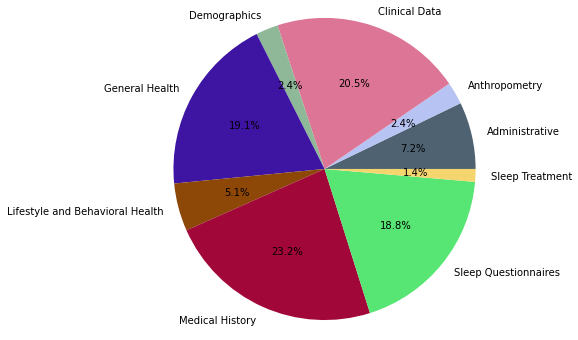

['Administrative', 'Anthropometry', 'Clinical Data', 'Demographics', 'General Health', 'Lifestyle and Behavioral Health', 'Medical History', 'Sleep Questionnaires', 'Sleep Treatment']


In [26]:
before_selection_dataset = x_imputed
feature_dict = {}
for i in before_selection_dataset.columns:
    selected_df = var_dict[var_dict['id'] == i]
    ctgry = selected_df["folder"].str.split('/').str[0].values[0]
    feature_dict[ctgry] = feature_dict.get(ctgry, 0) + 1
temp = []
for key in feature_dict.keys():
    temp.append((key, feature_dict[key]))

temp.sort()
labels = [x[0] for x in temp]

vals = [x[1] for x in temp]
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#3E14A2', '#8D4707', '#A10738','#57E673', '#F5D56E']
plt.figure(figsize=(6, 6))
plt.pie(vals, labels=labels, autopct='%1.1f%%', colors = colors)
plt.axis('equal') 
plt.savefig('forward_pie_chart.png', dpi=300) 
plt.show()
print(labels)

# Feature selection

### Plot the category ditribution of the selected features after forward selection

In [17]:
forward_selection_features = []

# Start with an arbitrarily large initial MSE
previous_mse = float('inf')
mse_change_threshold = 1e-5  # Adjust this threshold value based on the scale of your MSE

#run forward selection
while len(forward_selection_features) < len(x_imputed.columns):
    remaining_features = list(set(x_imputed.columns) - set(forward_selection_features))
    best_feature_mse = float('inf')
    best_feature = None

    for feature in remaining_features:
        candidate_features = forward_selection_features.copy()
        candidate_features.append(feature)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(x_imputed[candidate_features], y, test_size=0.2, random_state=42)

        # Fit a model with the selected features
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model with the added feature
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        # Update the best feature if the current one is better (lower MSE)
        if mse < best_feature_mse:
            best_feature_mse = mse
            best_feature = feature

    # Break the loop if change in MSE is smaller than the threshold or if no significant decrease in MSE
    if abs(best_feature_mse - previous_mse) < mse_change_threshold or best_feature is None:
        print("No significant improvement in MSE or no further significant feature found. Stopping forward selection.")
        break

    forward_selection_features.append(best_feature)
    print(f"Added feature: {best_feature}, Mean Squared Error with Features: {best_feature_mse}")

    # Update the previous MSE for the next iteration
    previous_mse = best_feature_mse


Added feature: neck20, Mean Squared Error with Features: 79.04768989057341
Added feature: weight, Mean Squared Error with Features: 77.56948755808072
Added feature: age_s1, Mean Squared Error with Features: 76.241582304009
Added feature: rawvt_s1, Mean Squared Error with Features: 75.72570357300029
Added feature: diasbp, Mean Squared Error with Features: 75.31461213705181
Added feature: asalw15, Mean Squared Error with Features: 75.05046280472985
Added feature: shhs1_tcvd, Mean Squared Error with Features: 74.83050543026741
Added feature: pptid, Mean Squared Error with Features: 74.32050716428525
Added feature: nonsp_st, Mean Squared Error with Features: 74.10989385290702
Added feature: twuweh02, Mean Squared Error with Features: 73.91855108457337
Added feature: ccb1, Mean Squared Error with Features: 73.75153165496994
Added feature: sleepy02, Mean Squared Error with Features: 73.58517596772056
Added feature: hf15, Mean Squared Error with Features: 73.42803420417047
Added feature: smkn

107


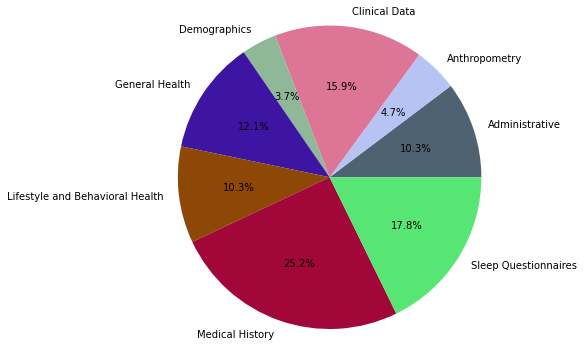

['Administrative', 'Anthropometry', 'Clinical Data', 'Demographics', 'General Health', 'Lifestyle and Behavioral Health', 'Medical History', 'Sleep Questionnaires']


C:\Users\minyu\AppData\Local\Temp/ipykernel_1124/1687643650.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_selection_dataset['ahi_c0h4a'] = shhs1['ahi_c0h4a']


In [25]:
forward_selection_dataset = x_imputed[forward_selection_features]
print(len(forward_selection_features))
feature_dict = {}
for i in forward_selection_dataset.columns:
    selected_df = var_dict[var_dict['id'] == i]
    ctgry = selected_df["folder"].str.split('/').str[0].values[0]
    feature_dict[ctgry] = feature_dict.get(ctgry, 0) + 1

temp = []
for key in feature_dict.keys():
    temp.append((key, feature_dict[key]))

temp.sort()
labels = [x[0] for x in temp]

vals = [x[1] for x in temp]
plt.figure(figsize=(6, 6))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#3E14A2', '#8D4707', '#A10738','#57E673', '#F5D56E']
plt.pie(vals, labels=labels, autopct='%1.1f%%', colors = colors)
#plt.title('Forward selection feature distribution (target variable: ahi_c0h4a)')
plt.axis('equal') 
plt.savefig('forward_pie_chart.png', dpi=300) 
plt.show()
print(labels)
forward_selection_dataset['ahi_c0h4a'] = shhs1['ahi_c0h4a']

In [25]:
# Create a new dataset with only the features having non-zero mutual information
forward_selection_dataset = x_imputed[forward_selection_features]

# Add the 'ahi_c0h3a' column to the new dataset
forward_selection_dataset['ahi_c0h3a'] = shhs1['ahi_c0h3a']

C:\Users\minyu\AppData\Local\Temp/ipykernel_2112/314187229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_selection_dataset['ahi_c0h3a'] = shhs1['ahi_c0h3a']


In [26]:
forward_selection_dataset.to_csv('forward_selection_ahi_c0h3a.csv', index=False)

In [30]:
forward_selection_dataset=forward_selection_dataset.drop(columns=['ahi_c0h3a'])

In [31]:
forward_selection_dataset.columns

Index(['neck20', 'waist', 'asalw15', 'rawvt_s1', 'smknow15', 'hosnr02',
       'shhs1_tcvd', 'age_s1', 'weight', 'pptid',
       ...
       'needbr02', 'betad1', 'htnderv_s1', 'twuwda02', 'niac1', 'hb02',
       'wksblk25', 'bathe25', 'ecg', 'av3deg'],
      dtype='object', length=102)

### Plot the category ditribution of the selected features after backward selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Starting with all the features
backward_selection_features = list(x_imputed.columns)

# Start with an arbitrarily large initial MSE
previous_mse = float('inf')
mse_change_threshold = 1e-4  # Adjust this threshold value based on the scale of your MSE

#run backward selection
while len(backward_selection_features) > 0:
    removed_feature_mse = float('inf')
    feature_to_remove = None

    for feature in backward_selection_features:
        candidate_features = backward_selection_features.copy()
        candidate_features.remove(feature)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(x_imputed[candidate_features], y, test_size=0.2, random_state=42)

        # Fit a model with the selected features
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model without the current feature
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        # Update the best feature to remove if the current one is better (lower MSE)
        if mse < removed_feature_mse:
            removed_feature_mse = mse
            feature_to_remove = feature

    # Break the loop if change in MSE is smaller than the threshold or if removing a feature increases the MSE
    if abs(removed_feature_mse - previous_mse) < mse_change_threshold or removed_feature_mse > previous_mse:
        print("No significant improvement in MSE or removing any more features deteriorates the model. Stopping backward selection.")
        break

    backward_selection_features.remove(feature_to_remove)
    print(f"Removed feature: {feature_to_remove}, Mean Squared Error without Feature: {removed_feature_mse}")

    # Update the previous MSE for the next iteration
    previous_mse = removed_feature_mse

Removed feature: mh_s1, Mean Squared Error without Feature: 81.115065600947
Removed feature: o2thpy02, Mean Squared Error without Feature: 78.56814127227425
Removed feature: incar02, Mean Squared Error without Feature: 78.01789206481003
Removed feature: nges02, Mean Squared Error without Feature: 77.58309364706388
Removed feature: sa15, Mean Squared Error without Feature: 77.22474858776943
Removed feature: weight20, Mean Squared Error without Feature: 76.92693926789767
Removed feature: twuwea02, Mean Squared Error without Feature: 76.64961488488353
Removed feature: parrptdiab, Mean Squared Error without Feature: 76.40190308740976
Removed feature: cabg15, Mean Squared Error without Feature: 76.16003640198335
Removed feature: bmi_s1, Mean Squared Error without Feature: 75.95483118922297
Removed feature: thry1, Mean Squared Error without Feature: 75.74789973514767
Removed feature: sinus15, Mean Squared Error without Feature: 75.54707675102652
Removed feature: dias320, Mean Squared Error w

Removed feature: yrsns15, Mean Squared Error without Feature: 69.69170496792555
Removed feature: sittlk02, Mean Squared Error without Feature: 69.67404385889262
Removed feature: hostbr02, Mean Squared Error without Feature: 69.65643263448405
Removed feature: exefrt25, Mean Squared Error without Feature: 69.64212370608053
Removed feature: phacls25, Mean Squared Error without Feature: 69.60862042284114
Removed feature: loop1, Mean Squared Error without Feature: 69.59394685488198
Removed feature: diuret1, Mean Squared Error without Feature: 69.51349587890401
Removed feature: pacem15, Mean Squared Error without Feature: 69.49485290095
Removed feature: imdbpae, Mean Squared Error without Feature: 69.48568937288293
Removed feature: pf_s1, Mean Squared Error without Feature: 69.47769509658903
Removed feature: twuwda02, Mean Squared Error without Feature: 69.46831440152215
Removed feature: tfawea02, Mean Squared Error without Feature: 69.45881861097425
Removed feature: age_category_s1, Mean Sq

In [28]:
backward_selection_dataset = x_imputed[backward_selection_features]

In [29]:
feature_dict = {}
for i in backward_selection_dataset.columns:
    selected_df = var_dict[var_dict['id'] == i]
    ctgry = selected_df["folder"].str.split('/').str[0].values[0]
    feature_dict[ctgry] = feature_dict.get(ctgry, 0) + 1

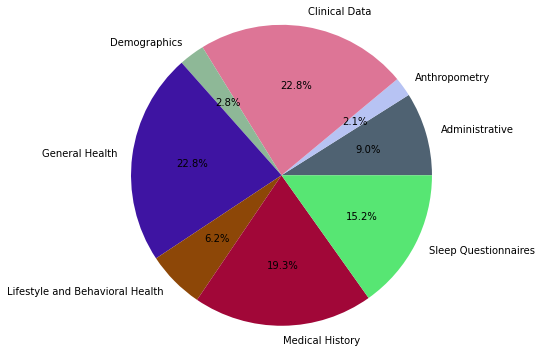

In [30]:
temp = []
for key in feature_dict.keys():
    temp.append((key, feature_dict[key]))

temp.sort()
labels = [x[0] for x in temp]

vals = [x[1] for x in temp]
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#3E14A2', '#8D4707', '#A10738','#57E673', '#F5D56E']
plt.figure(figsize=(6, 6))
plt.pie(vals, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal') 
plt.savefig('pie_chart_backward.png', dpi=300) 
plt.show()

In [29]:
len(backward_selection_features)

145